# **Information Retrieval In High Dimensional Data**
## **Assignment 3 - Group 13**
  Group members | IDs
--- | ---
**Hoang Giang Dang** | 03676899
**Julian Bärtschi**  | 03738123
**Lukas Vogtmann** | 03745272
**Anja Pilz** | 03729350
**Aman Kumar**  | 03722433
**Lisa-Yao Gan** | 03695778
**Estefania Tealdo** | 03717779

In [11]:
import numpy as np

In [12]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

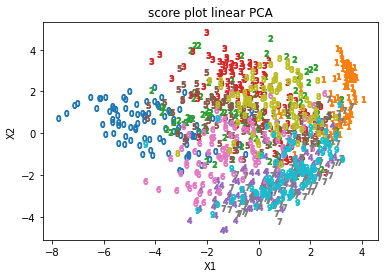

In [13]:
import os, glob
import imageio
import matplotlib.pyplot as plt

general_dir = './mnist_train/mnist/'
digit_dirs = ['d{}'.format(i) for i in range(10)]
img_type = 'png'

n_train = 100
img_rows = 28
img_cols = 28
k = 2

X_data = []
X_labels = []

for label, digit in enumerate(digit_dirs):
    for i in range(n_train):
        # set directory with filetype
        file = glob.glob(general_dir + digit +
                         '/' + digit + '_{:04d}.'.format(i+1) + img_type)
        # read images, vectorize and normalize them
        X_data.append(np.array(imageio.imread(file[0])).astype(np.float64).ravel()/255)
        # save label of image
        X_labels.append(label)
X_data=np.array(X_data).T


lin_pca = linear_pca(X_data, k)

# plot first two scores
for label,_ in enumerate(digit_dirs):
    plt.scatter(lin_pca[0,label*n_train:(label+1)*n_train], lin_pca[1, label*n_train:(label+1)*n_train], marker='${}$'.format(label))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('score plot linear PCA')
plt.show()

In [14]:
def gram_pca(K,k):
    # Centering the data
    n = len(K)
    one = np.ones((n, 1))
    H = np.eye(n) - (one @ one.T)/n
    K_centered = H @ K @ H

    # eigenvalue decomposition
    eigenValues, eigenVectors = np.linalg.eig(K_centered)
    # np.linalg.eig return may be not sorted
    idx = eigenValues.argsort()[::-1]
    eigenValues = np.real(eigenValues[idx])
    # only first k elements needed
    V = np.real(eigenVectors[:, idx[:k]])
    # Sigma is diagonal Matrix
    Sigma = np.diag(np.sqrt(eigenValues[:k]))
    # return reduced training data
    S = np.real(Sigma @ np.transpose(V))
    return S

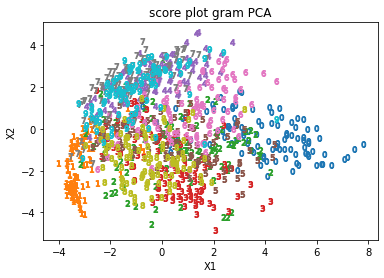

In [15]:
# K is the inner product of the data (X.T @ X)
K_linear = np.transpose(X_data) @ X_data
gram_components = gram_pca(K_linear, k)

# plot first two scores
for label,_ in enumerate(digit_dirs):
    plt.scatter(gram_components[0,label*n_train:(label+1)*n_train], gram_components[1, label*n_train:(label+1)*n_train], marker='${}$'.format(label))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('score plot gram PCA')
plt.show()

In [16]:
def compute_gaussian_gram_matrix(X, sigma):
    num_data_vectors = X.shape[1]
    K = np.zeros([num_data_vectors,num_data_vectors])
    for i in range(num_data_vectors):
        for j in range(num_data_vectors):
            temp = np.array(X[:,i]-X[:,j])
            K[i,j]=np.exp(-(temp.T@temp)/(2*sigma**2))
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

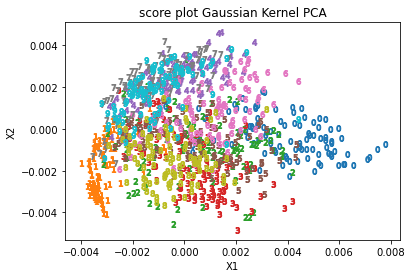

In [17]:
gaussian_kernel_components = gaussian_kernel_pca(X_data, k, 1000)

# plot first two scores
for label,_ in enumerate(digit_dirs):
    plt.scatter(gaussian_kernel_components[0,label*n_train:(label+1)*n_train], gaussian_kernel_components[1, label*n_train:(label+1)*n_train], marker='${}$'.format(label))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('score plot Gaussian Kernel PCA')
plt.show()


## Alternative data for testing: circles in 2D
use sigma = 4 for good separability

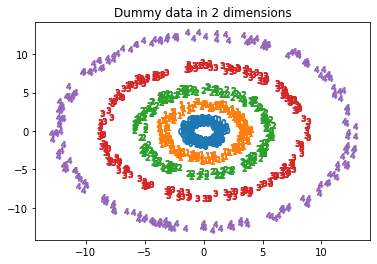

In [18]:
rand= np.random.rand(200,2,5)
r_bias = [1,3,5,8,12]
data= np.array([rand[:,0,:] + r_bias, rand[:,1,:]*2*np.pi])
data = data.reshape(2,1000, order='F')
x = data[0,:]*np.cos(data[1,:])
y = data[0,:]*np.sin(data[1,:])

X_data_circles = np.array([x,y])

for label,_ in enumerate(rand[0,0,:]):
    plt.scatter(x[label*200:(label+1)*200],y[label*200:(label+1)*200],marker='${}$'.format(label))

plt.title('Dummy data in 2 dimensions')
plt.show()
